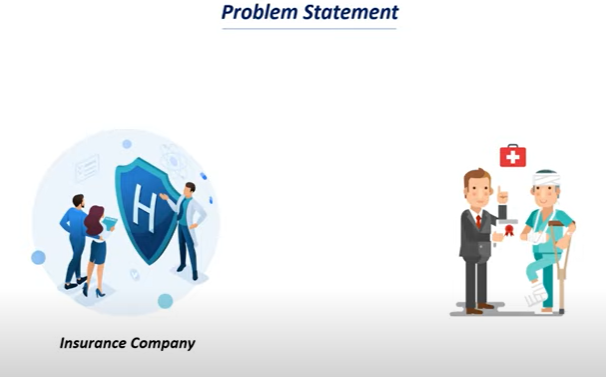
     *Lets assume there is Medical Insurance Company where they want to create an automatic system that can predict what will be the cost of individual person's Medical Insurance.*

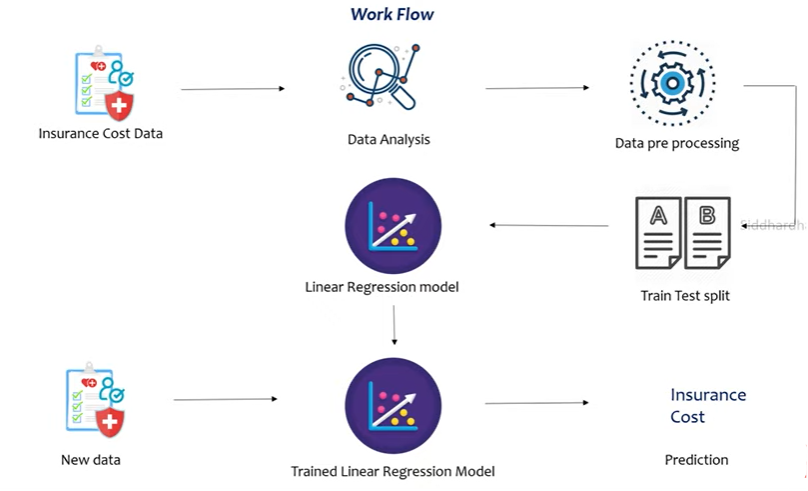
1. To collect the data of Insurance cost
2. Then perform Data Analysis
3. Data Preprocessing 
4. Train Test Split
5. Machine Learning Model 
6. Evaluate the model 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the data from csv file to a Pandas Data frame 
df = pd.read_csv('insurance.csv')

In [3]:
# first five rows 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [7]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [8]:
df['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [9]:
# the number rows and Columns
df.shape

(1338, 7)

In [10]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The categorical features are

     . sex
     . smoker
     . region

In [11]:
# checking Null values

In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df[df.isnull()].columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [14]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

###  Data Analysis

In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


With the given columns and their respective datatypes in the insurance dataset, you can create various types of plots using the `matplotlib.pyplot` and `seaborn` libraries. Here are some suggestions for the types of plots you can create:

1. Histogram: You can plot histograms to visualize the distribution of numerical variables such as `age`, `bmi`, `children`, and `charges`. This helps you understand the data's central tendency, spread, and identify any outliers.

2. Bar Plot: A bar plot can be used to compare categorical variables like `sex`, `smoker`, and `region`. It shows the frequency or count of each category and helps you identify any patterns or trends.

3. Scatter Plot: A scatter plot can be used to visualize the relationship between two numerical variables, such as `age` vs. `charges` or `bmi` vs. `charges`. This plot helps you identify any correlations or clusters in the data.

4. Box Plot: Box plots are useful for visualizing the distribution of a numerical variable across different categories. You can create box plots to compare variables like `charges` across different levels of categorical variables such as `sex`, `smoker`, or `region`. It helps identify any differences or outliers.

5. Violin Plot: Similar to box plots, violin plots display the distribution of a numerical variable across different categories. They provide additional information by showing the kernel density estimation of the variable. You can create violin plots to compare variables like `charges` across different levels of categorical variables.

6. Bar Plot (Grouped or Stacked): If you want to compare two categorical variables simultaneously, you can create grouped or stacked bar plots. For example, you can create a grouped or stacked bar plot to compare the number of `smokers` and `non-smokers` in different `regions`.

7. Heatmap: If you have a larger dataset, you can create a heatmap to visualize the correlation between different numerical variables, such as `age`, `bmi`, `children`, and `charges`. This helps identify any strong or weak relationships between variables.

These are just some examples of the plots you can create using `matplotlib.pyplot` and `seaborn` libraries. You can explore additional plot types and customization options provided by these libraries to create informative and visually appealing visualizations based on your specific requirements.

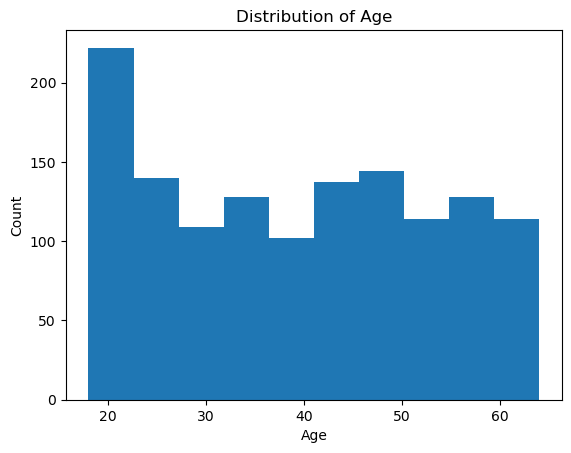

In [16]:
# Histogram using for Distribution of Age Column
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

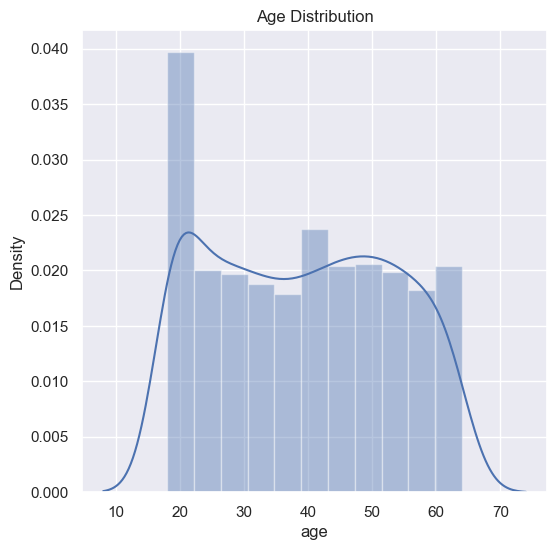

In [17]:
# Distribution of Age Column
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

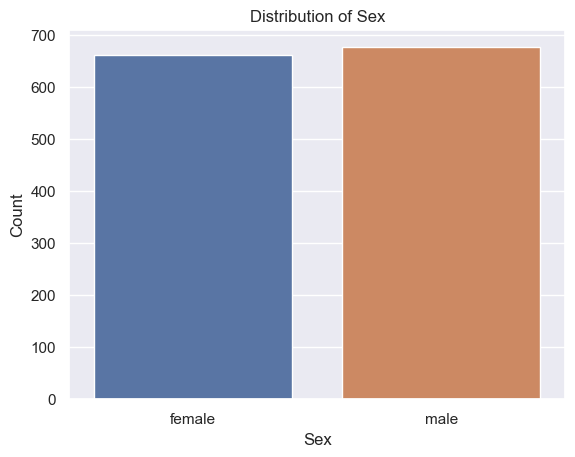

In [18]:
# Bar Plot
sns.countplot(x='sex', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

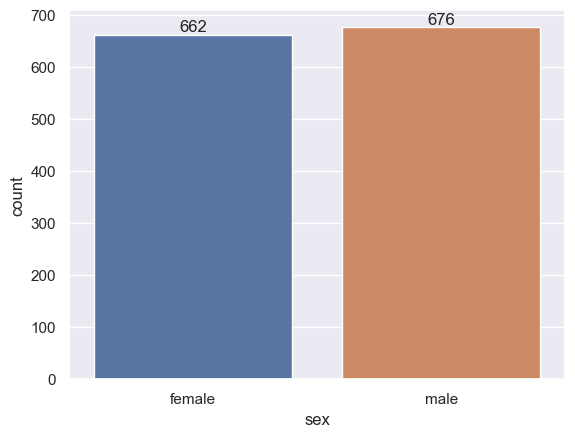

In [19]:
ax = sns.countplot(x='sex', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

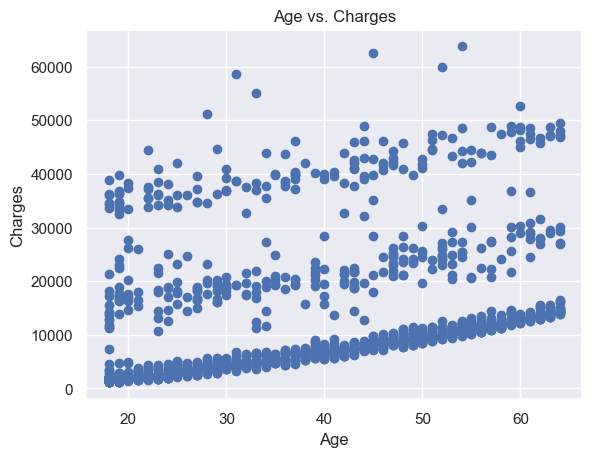

In [20]:
# Scatter Plot
plt.scatter(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs. Charges')
plt.show()

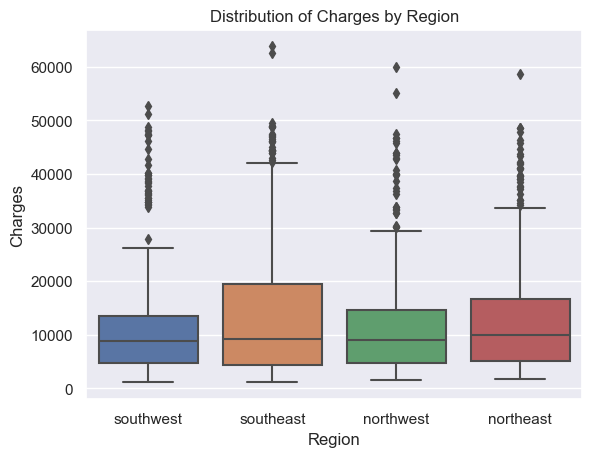

In [21]:
# Box Plot
sns.boxplot(x='region', y='charges', data=df)
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Distribution of Charges by Region')
plt.show()

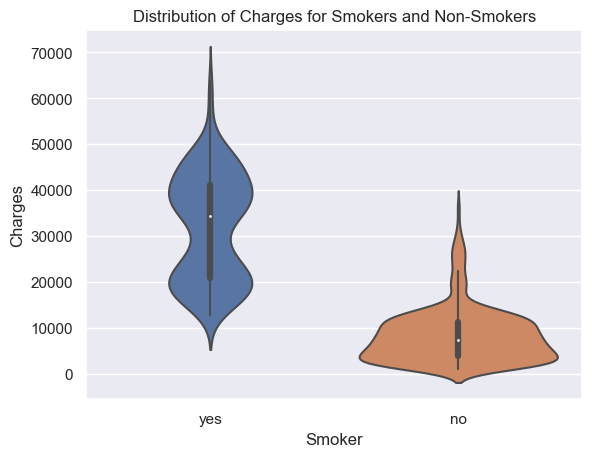

In [22]:
# Violin Plot
sns.violinplot(x='smoker', y='charges', data=df)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Distribution of Charges for Smokers and Non-Smokers')
plt.show()

*from the above violin chart we get insights where it tells you about the charges of the smokers and non-smokers*

*The charges for smokers are much higher compare to non-smokers.**

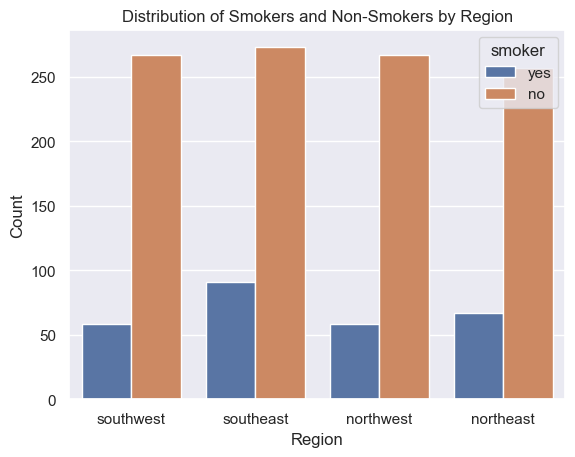

In [23]:
# Grouped Bar Plot
sns.countplot(x='region', hue='smoker', data=df)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Smokers and Non-Smokers by Region')
plt.show()

*From all the respective region if you see the count of non-smokers is less as compare to smokers count*

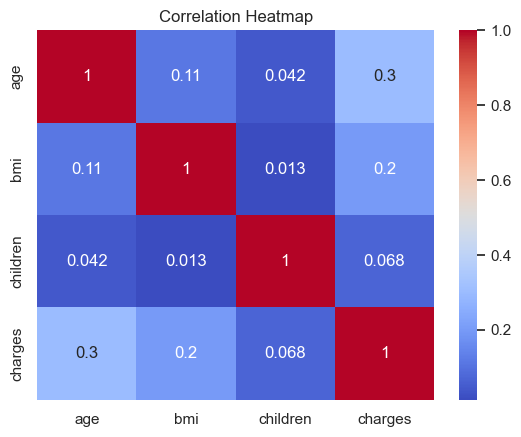

In [24]:
# Heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# ---------------------------------------------------------------
*Line Plot: If you have a time-based dataset, you can create a line plot to visualize the trend or evolution of a numerical variable over time. For example, you can plot the charges over different age groups.*

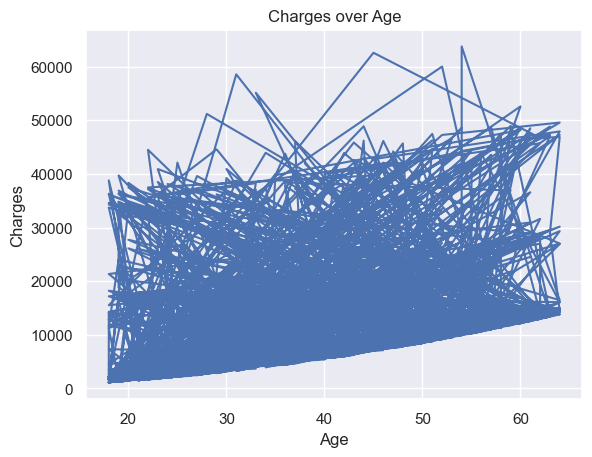

In [25]:
plt.plot(df['age'], df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Charges over Age')
plt.show()


# -----------------------------------------------------------------

*KDE Plot: Kernel Density Estimation (KDE) plots can be used to visualize the distribution of a numerical variable. It provides a smoothed representation of the data's underlying distribution.*

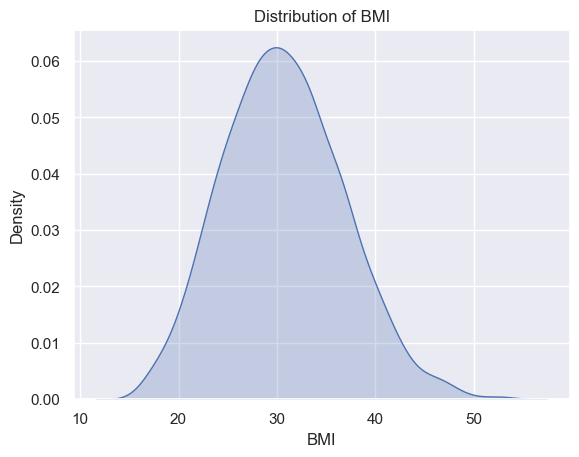

In [26]:
sns.kdeplot(df['bmi'], shade=True)
plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('Distribution of BMI')
plt.show()


In [27]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

# -------------------------------------------------------------

*Pair Plot: A pair plot can be used to visualize pairwise relationships between multiple numerical variables. It displays scatter plots for each combination of variables and histograms along the diagonal.*

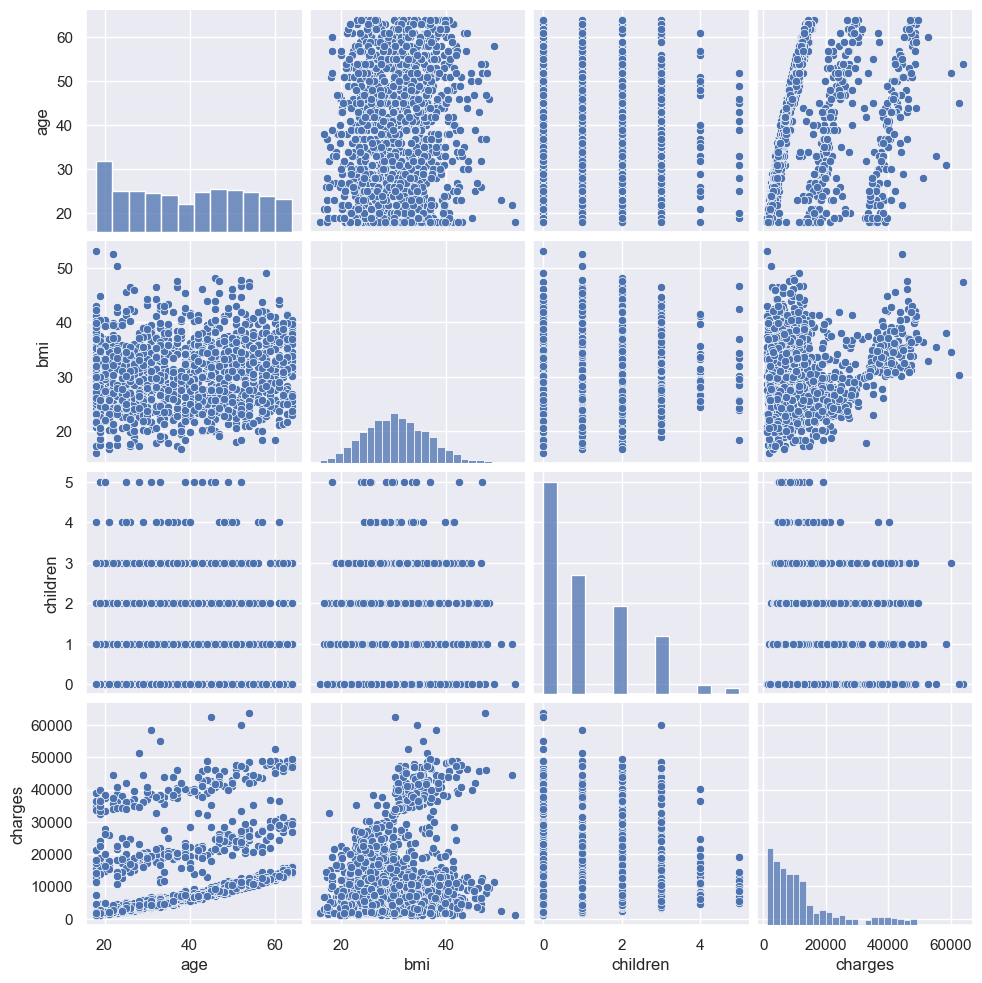

In [28]:
sns.pairplot(df[['age', 'bmi', 'children', 'charges']])
plt.show()


In [29]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


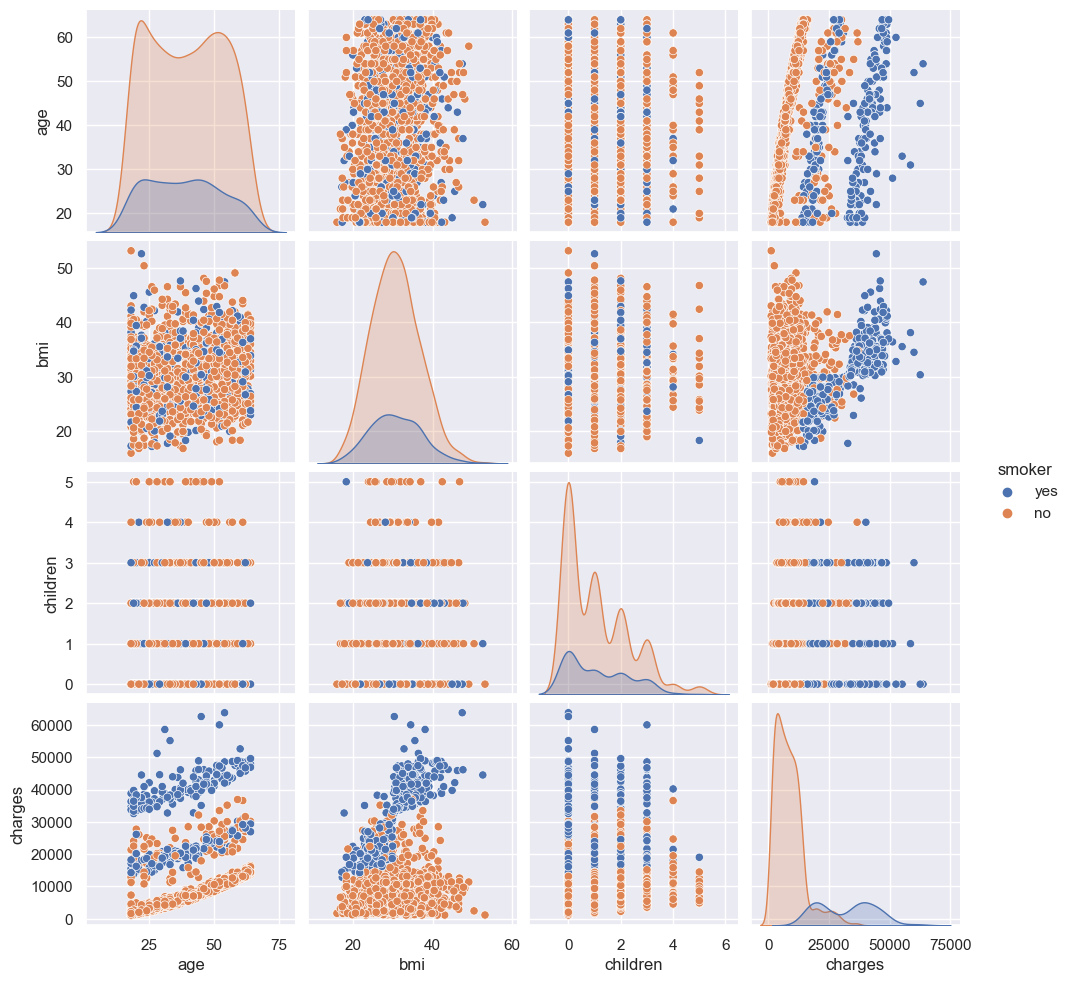

In [30]:
sns.pairplot(df, hue = 'smoker')

# ---------

*Joint Plot: Joint plots display the relationship between two numerical variables, including scatter plots, histograms, and kernel density estimates.*

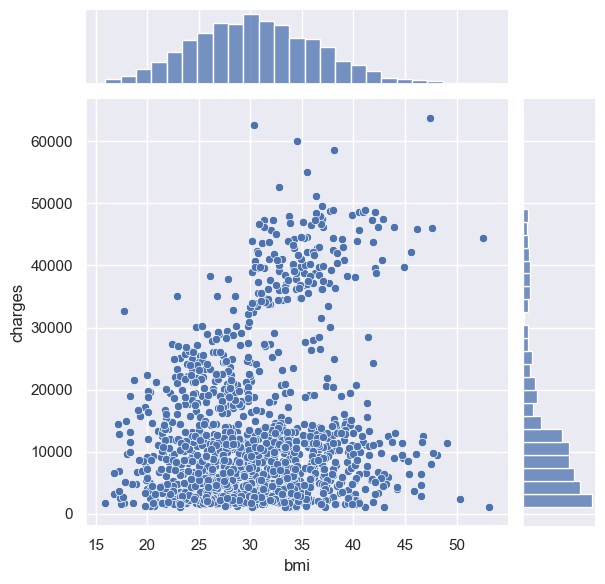

In [31]:
sns.jointplot(x='bmi', y='charges', data=df, kind='scatter')
plt.show()


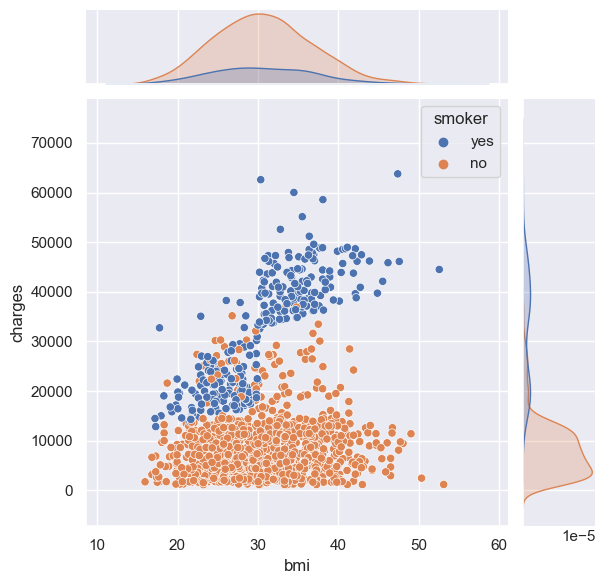

In [32]:
sns.jointplot(x='bmi', y='charges', data=df, kind='scatter', hue = 'smoker')
plt.show()


*1.By the above insights we get to know that having high body mass may cauuse you high charges.*

*2.Smokers with high and low Bmi has the charges above 10000*

*3. Most of the non-smokers with high and low bmi has charges less than 10000*

In [33]:
# lets see the count of non-smoker who has charges less than 10000
df[(df.smoker=='no') & (df.charges<=10000)]

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
...,...,...,...,...,...,...,...
1326,42,female,32.87,0,no,northeast,7050.0213
1327,51,male,30.03,1,no,southeast,9377.9047
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335


In [34]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

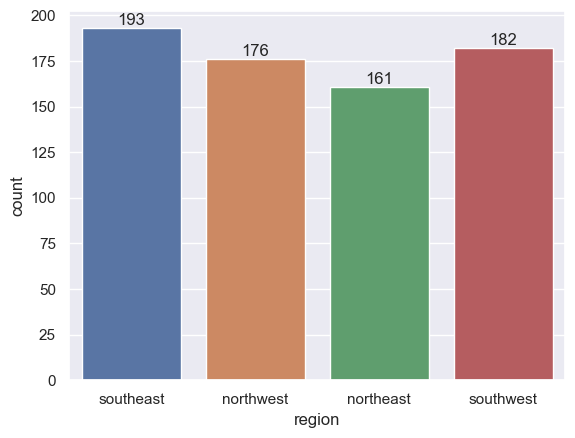

In [35]:
# let see from which region these nonsmokers belongs
a = df[(df.smoker=='no') & (df.charges<=10000)]
ax = sns.countplot(data = a, x = 'region' )
for bars in ax.containers:
    ax.bar_label(bars)

In [36]:
a.groupby('region')['region'].value_counts().nlargest()

region     region   
southeast  southeast    193
southwest  southwest    182
northwest  northwest    176
northeast  northeast    161
Name: region, dtype: int64

In [37]:
a.groupby('region')['region'].nlargest()

TypeError: Cannot use method 'nlargest' with dtype object

# --------------------
*Count Plot: Count plots can be used to visualize the frequency or count of a categorical variable.*

In [ ]:
sns.countplot(x='children', data=df)
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Distribution of Number of Children')
plt.show()


In [ ]:
ax = sns.countplot(x='children', data=df)
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Distribution of Number of Children')

for bars in ax.containers:
    ax.bar_label(bars)


In [ ]:
df.head()

In [ ]:
df[(df.children==0)]

# ---------
*Swarm Plot: Swarm plots display the distribution of a numerical variable across different categories, avoiding overlapping points.*

In [ ]:
sns.swarmplot(x='smoker', y='charges', data=df)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Distribution of Charges for Smokers and Non-Smokers')
plt.show()


In [ ]:
sns.swarmplot(x='smoker', y='charges', data=df, hue = 'smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Distribution of Charges for Smokers and Non-Smokers')
plt.show()

# -----------
*Bar Plot with Error Bars: If you have aggregated data with error or confidence intervals, you can create a bar plot with error bars to visualize the uncertainty in the estimates.*

In [ ]:
sns.barplot(x='region', y='charges', data=df, ci='sd')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Average Charges by Region')
plt.show()


In [ ]:
ax = sns.barplot(x='region', y='charges', data=df, ci='sd')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Average Charges by Region')

for bars in ax.containers:
    ax.bar_label(bars,padding = 126)

In [ ]:
df.columns

In [ ]:
# gender distribution
sns.countplot(data = df , x = 'sex')
plt.xlabel('Sex')
plt.title('Sex Distribution')
plt.show()

In [ ]:
# gender distribution
ax = sns.countplot(data = df , x = 'sex')
plt.xlabel('Sex')
plt.title('Sex Distribution')
for bars in ax.containers:
    ax.bar_label(bars)

*The total count of women are 662 and male are 676*

In [ ]:
# gender distribution
sns.countplot(data = df , x = 'sex', hue = 'smoker')
plt.xlabel('Sex')
plt.title('Sex Distribution')
plt.show()

In [ ]:
# gender distribution
ax = sns.countplot(data = df , x = 'sex', hue ='smoker')
plt.xlabel('Sex')
plt.title('Sex Distribution')
for bars in ax.containers:
    ax.bar_label(bars)

*115 women are smoker and 547 are non-smoker*

*159 male are smoker and 517 are non-smoker*

In [ ]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.xlabel('BMI - Body MAss Index')
plt.title('BMI Distribution')
plt.show()

*The normal BMI range ---> 18.5 to 24.9*

In [ ]:
# childern Column 
plt.figure(figsize=(6,6))
sns.countplot(x = 'children', data = df)
plt.title('Children')
plt.show()

In [ ]:
# childern Column 
plt.figure(figsize=(6,6))
ax = sns.countplot(x = 'children', data = df)
plt.title('Children')

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
df['children'].value_counts()

In [ ]:
# smoker column
import matplotlib.pyplot as plt

# Calculate the counts for each category
smoker_counts = df['smoker'].value_counts()

# Create a pie chart
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%')
plt.title('Smoker Distribution')


# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# add a legend
plt.legend()

# Display the chart
plt.show()


In [ ]:
ax = sns.countplot(data=df, x = 'smoker')
plt.title('smoker')
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
df['smoker'].value_counts()

In [ ]:
# charges column
sns.distplot(df['charges'])

*Based on the provided columns and their data types, you can ask several insightful questions using the pandas library. Here are some examples:*

In [ ]:
# 1.What is the average age of the individuals in the dataset?
df['age'].mean()

In [ ]:
average_age = df['age'].mean()
print("The average age is:", average_age)


In [ ]:
# 2. How many males and females are present in the dataset?
df['sex'].value_counts()

In [ ]:
gender_counts = df['sex'].value_counts()
print(gender_counts)


In [ ]:
# 3.What is the distribution of BMI values in the dataset?
df['bmi'].hist()
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.show()


In [ ]:
# 4.What is the maximum number of children an individual has?
df['children'].max()

In [ ]:
max_children = df['children'].max()
print("The maximum number of children is:", max_children)


In [ ]:
# 5.How many smokers and non-smokers are there in the dataset?
df['smoker'].value_counts()

In [ ]:
smoker_counts = df['smoker'].value_counts()
print(smoker_counts)


In [ ]:
# 6. Which regions are represented in the dataset?
df['region'].unique()

In [ ]:
regions = df['region'].unique()
print(regions)


In [ ]:
# 7.What is the range of charges in the dataset?
charge_range = df['charges'].max() - df['charges'].min()
print("The range of charges is:", charge_range)


In [ ]:
df['charges'].mean()

In [ ]:
#How many individuals fall into different age groups (e.g., 20-30, 30-40, etc.)?
age_groups = pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70])
group_counts = age_groups.value_counts()
print(group_counts)


In [ ]:
# What is the correlation between age, BMI, and charges?
correlation_matrix = df[['age', 'bmi', 'charges']].corr()
print(correlation_matrix)


In [ ]:
correlation_matrix

In [ ]:
# What is the average BMI of males and females in the dataset?
df.groupby('sex')['bmi'].mean()

In [ ]:
df.groupby('sex')[['bmi']].agg(['mean'])

In [ ]:
df.groupby('sex')[['bmi']].agg(['mean']).reset_index()

In [ ]:
# How does the distribution of charges differ between smokers and non-smokers?
sns.boxplot(x='smoker', y='charges', data=df)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Distribution of Charges for Smokers and Non-Smokers')
plt.show()


In [ ]:
# What is the most common number of children among individuals in the dataset?
df['children'].mode()

In [ ]:
df['children'].mode().values[0]

In [ ]:
common_children = df['children'].mode().values[0]
print("The most common number of children is:", common_children)


In [ ]:
# How does the average charges vary across different regions?
a = df.groupby('region',as_index=False)['charges'].mean().sort_values(by = 'charges')
a

In [ ]:
sns.barplot(data = a, x = 'region', y = 'charges' )

In [ ]:
ax = sns.barplot(data = a, x = 'region', y = 'charges' )
for bars in ax.containers:
    ax.bar_label(bars)

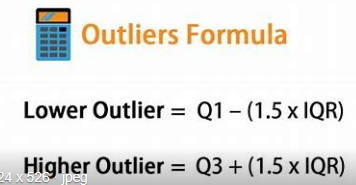

In [ ]:
# Are there any outliers in the BMI values? If so, how many?
Q3 = df['bmi'].quantile(0.75)
Q1 = df['bmi'].quantile(0.25)
print(Q3)
print(Q1)

In [ ]:
IQR = Q3 - Q1
IQR

In [ ]:
le = Q1 - (1.5*IQR)
he = Q3 + (1.5*IQR)
print(le)
print(he)

In [ ]:
outliers_bmi = df[(df['bmi'] < le) | (df['bmi'] > he)]
num_outliers = outliers_bmi.shape[0]
print("Number of outliers in BMI:", num_outliers)


In [ ]:
# What is the distribution of charges for individuals with different numbers of children?
sns.boxplot(x='children', y='charges', data=df)
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.title('Distribution of Charges by Number of Children')
plt.show()


In [ ]:
# Is there any relationship between BMI and charges for smokers and non-smokers separately?
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs. Charges (Smoker vs. Non-Smoker)')
plt.show()


### Data Preprocessing

In [ ]:
df.head()

In [ ]:
x = df.iloc[:,:-1]
x

In [ ]:
y = df.iloc[:,-1]
y

In [ ]:
# Encoding the categorical features.
from sklearn.preprocessing import OrdinalEncoder

# create the object of the class
oe = OrdinalEncoder()

In [ ]:
x.select_dtypes(object).columns

In [ ]:
x[['sex', 'smoker', 'region']] = oe.fit_transform(x[['sex', 'smoker', 'region']])

In [ ]:
oe.feature_names_in_

In [ ]:
df.columns

In [ ]:
oe.categories_

### Separating the X and Y feature for Training purpose

In [ ]:
x

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
df.shape[0]*20/100

In [ ]:
xtest.shape

In [ ]:
x.shape

In [ ]:
xtrain.shape

In [ ]:
xtest.shape

In [ ]:
y.shape

In [ ]:
ytrain.shape

In [ ]:
ytest.shape

### Model Training -- Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# create object of the class
linreg = LinearRegression()

In [ ]:
# train our model Training data 
linreg.fit(xtrain,ytrain)

In [ ]:
ypred = linreg.predict(xtest)

In [ ]:
ytest.head()

In [ ]:
ypred

## Regression Evaluation Metrics

*It is a measure of how wrong the model is, in terms of it's ability to estimate the relationship between variables.*

Here are three common evaluation metrics for regression problems:

*Mean Absolute Error* (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-y_{pi}|$$

*Mean Squared Error* (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-y_{pi})^2$$

*Root Mean Squared Error* (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-y_{pi})^2}$$

Comparing these metrics:

- *MAE* is the easiest to understand, because it's the average error.
- *MSE* is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- *RMSE* is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are *loss functions*, because we want to minimize them.

*RSquare* Correctness of Regression line:
$$\sum(y_p-\hat{y}_i)^2$$
$$\sum(y-\hat{y}_i)^2$$

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
mae = mean_absolute_error(ytest,ypred)

mse = mean_squared_error(ytest,ypred)

rmse = np.sqrt(mse)

r2 = r2_score(ytest,ypred)

print(f"MAE :- {mae}\n MSE:- {mse}\n RMSE :- {rmse}\n ACCURACY:- {r2}")

In [ ]:
x.columns

In [ ]:
linreg.coef_

In [ ]:
train = linreg.score(xtrain,ytrain)

test = linreg.score(xtest,ytest)

print(f"Training Result :- {train}")
print(f"Testing Result :- {test}")

In [ ]:
linreg.score(xtrain,ytrain)

In [ ]:
linreg.score(xtest,ytest)

### Building a Predictive system or Testing Our Model with New Observation

In [ ]:
x.columns

In [ ]:
age = int(input("enter the Age: "))
sex = input('enter sex male or female: ')
bmi = eval(input("enter the bmi: "))
childern = int(input("enter the no. of childern: "))
smoker = input("enter smoker - yes or no: ")
region = input("enter the region: ")

In [ ]:
df.head()

In [ ]:
oe.categories_

In [ ]:
input_data = [31,1,2.5,4,1,1]

In [ ]:
linreg.predict([input_data])

In [ ]:
a = linreg.predict([[31,0,25.74,0,0,2]])
print('The Insurance Cost is USD: ', a[0])

In [ ]:
l1 = []

for i in df.columns[:-1]:
    print(i)

In [ ]:
df.dtypes

In [ ]:
l1 = []
for i in df.columns[:-1]:
    if df[i].dtype =='int64' or df[i].dtype == 'float64':
        val = eval(input(f'enter {i}: '))
        l1.append(val)
    else:
        val = input(f"enter {i}: ")
        l1.append(val)
l1[1],l1[-1],l1[-2] = oe.transform([[l1[1],l1[-1],l1[-2]]])[0]
linreg.predict([l1])[0]


In [ ]:
df['region'].value_counts()

### Lets check with Ridge and Lasso, as such we dont require hyperparameter Tuning but then lets see

In [ ]:
from sklearn.linear_model import Ridge, Lasso

#### Ridge

In [ ]:
for i in range(1,20):
    l2 = Ridge(alpha = i)
    l2.fit(xtrain,ytrain)
    
    train = l2.score(xtrain,ytrain)
    test = l2.score(xtest,ytest)
    
    print(f"{i} {train} {test}")

#### Lasso

In [ ]:
for i in range(1,20):
    las = Lasso(alpha=i)
    las.fit(xtrain,ytrain)
    
    train = las.score(xtrain,ytrain)
    test = las.score(xtest,ytest)
    
    print(f"{i} {train} {test}")

There are several other machine learning algorithms that can be used for regression problems apart from Linear Regression. Here are some popular ones:

1. Decision Tree Regression: Decision tree algorithms create a model that predicts the target variable by making decisions based on feature values. Decision tree regression is effective for both linear and nonlinear relationships.

2. Random Forest Regression: Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It can handle complex relationships, reduce overfitting, and provide feature importance.

3. Gradient Boosting Regression: Gradient Boosting is another ensemble learning technique that combines weak predictive models (typically decision trees) to create a strong predictive model. Examples include Gradient Boosting Regression (e.g., XGBoost, LightGBM) and AdaBoost.

4. Support Vector Regression (SVR): SVR is a variant of Support Vector Machines (SVM) that is used for regression tasks. It aims to find a hyperplane that has a maximum margin from the target variable.

5. Neural Networks: Deep learning models, such as Artificial Neural Networks (ANN), can be used for regression problems. Multi-layer perceptron (MLP) networks are a common choice for regression tasks, and there are various architectures to explore (e.g., feedforward, convolutional, recurrent).

6. K-Nearest Neighbors (KNN) Regression: KNN is a non-parametric algorithm that predicts the target variable based on the values of its k nearest neighbors. It can handle both linear and nonlinear relationships.

7. Gaussian Process Regression: Gaussian Process Regression models are Bayesian models that estimate the target variable based on a distribution of possible functions. It can capture complex relationships and provide uncertainty estimates.

8. Lasso and Ridge Regression: These are regularization techniques that modify the linear regression algorithm. Lasso regression performs L1 regularization (which encourages sparsity), while Ridge regression performs L2 regularization (which shrinks the coefficients).

9. ElasticNet Regression: ElasticNet is a combination of Lasso and Ridge regression techniques. It provides a balance between the L1 and L2 regularization penalties.

10. Decision Forest Regression: Decision Forests, such as Random Forests and Extra Trees, can be used for regression tasks as well. They build an ensemble of decision trees and make predictions based on their outputs.

These are just a few examples of machine learning algorithms used for regression problems. The choice of algorithm depends on the specific characteristics of your dataset, the nature of the problem, and the desired trade-offs between interpretability, model complexity, and performance. It's often a good practice to experiment with multiple algorithms and evaluate their performance to find the best approach for your regression problem.

*Certainly! Here's an example of the syntax for using the mentioned machine learning algorithms for regression problems. Note that the syntax may vary depending on the specific Python libraries you choose to use:*

### Decision Tree Regression (Scikit-learn):

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create the decision tree regressor
regressor = DecisionTreeRegressor()

# Fit the model to the training data
regressor.fit(xtrain, ytrain)

# Make predictions on the test data
ypred = regressor.predict(xtest)

### Evaluation Metrics

In [ ]:
mae = mean_absolute_error(ytest,ypred)

mse = mean_squared_error(ytest,ypred)

rmse = np.sqrt(mse)

r2 = r2_score(ytest,ypred)

print(f"MAE :- {mae}\n MSE:- {mse}\n RMSE :- {rmse}\n ACCURACY:- {r2}")

In [ ]:
train = regressor.score(xtrain,ytrain)

test = regressor.score(xtest,ytest)

print(f"Training Result :- {train}")
print(f"Testing Result :- {test}")

#### Random Forest Regression (Scikit-learn):

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest regressor
regressor = RandomForestRegressor()

# Fit the model to the training data
regressor.fit(xtrain, ytrain)

# Make predictions on the test data
ypred = regressor.predict(xtest)


### Evaluation Metrics

In [ ]:
mae = mean_absolute_error(ytest,ypred)

mse = mean_squared_error(ytest,ypred)

rmse = np.sqrt(mse)

r2 = r2_score(ytest,ypred)

print(f"MAE :- {mae}\n MSE:- {mse}\n RMSE :- {rmse}\n ACCURACY:- {r2}")

In [ ]:
train = regressor.score(xtrain,ytrain)

test = regressor.score(xtest,ytest)

print(f"Training Result :- {train}")
print(f"Testing Result :- {test}")

In [ ]:
# low Bias 
# High Variance
# overfitting

#### Gradient Boosting Regression (XGBoost):

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

# Create the gradient boosting regressor
regressor = xgb.XGBRegressor()

# Fit the model to the training data
regressor.fit(xtrain, ytrain)

# Make predictions on the test data
ypred = regressor.predict(xtest)


### Evaluation Metrics

In [ ]:
mae = mean_absolute_error(ytest,ypred)

mse = mean_squared_error(ytest,ypred)

rmse = np.sqrt(mse)

r2 = r2_score(ytest,ypred)

print(f"MAE :- {mae}\n MSE:- {mse}\n RMSE :- {rmse}\n ACCURACY:- {r2}")

In [ ]:
train = regressor.score(xtrain,ytrain)

test = regressor.score(xtest,ytest)

print(f"Training Result :- {train}")
print(f"Testing Result :- {test}")

In [ ]:
# low Bias
# High Variance
# overfitting

#### Support Vector Regression (Scikit-learn):

In [ ]:
from sklearn.svm import SVR

# Create the support vector regressor
regressor = SVR()

# Fit the model to the training data
regressor.fit(xtrain, ytrain)

# Make predictions on the test data
ypred = regressor.predict(xtest)


### Evaluation Metrics

In [ ]:
mae = mean_absolute_error(ytest,ypred)

mse = mean_squared_error(ytest,ypred)

rmse = np.sqrt(mse)

r2 = r2_score(ytest,ypred)

print(f"MAE :- {mae}\n MSE:- {mse}\n RMSE :- {rmse}\n ACCURACY:- {r2}")

In [ ]:
train = regressor.score(xtrain,ytrain)

test = regressor.score(xtest,ytest)

print(f"Training Result :- {train}")
print(f"Testing Result :- {test}")

In [ ]:
# high bias 
# high Variance
# underfitting

#### K-Nearest Neighbors (Scikit-learn):

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create the K-nearest neighbors regressor
regressor = KNeighborsRegressor()

# Fit the model to the training data
regressor.fit(xtrain, ytrain)

# Make predictions on the test data
ypred = regressor.predict(xtest)


### Evaluation Metrics

In [ ]:
mae = mean_absolute_error(ytest,ypred)

mse = mean_squared_error(ytest,ypred)

rmse = np.sqrt(mse)

r2 = r2_score(ytest,ypred)

print(f"MAE :- {mae}\n MSE:- {mse}\n RMSE :- {rmse}\n ACCURACY:- {r2}")

In [ ]:
train = regressor.score(xtrain,ytrain)

test = regressor.score(xtest,ytest)

print(f"Training Result :- {train}")
print(f"Testing Result :- {test}")

In [ ]:
# high bias 
# high Variance
# underfitting

#### Gaussian Process Regression (Scikit-learn):

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor

# Create the Gaussian process regressor
regressor = GaussianProcessRegressor()

# Fit the model to the training data
regressor.fit(xtrain, ytrain)

# Make predictions on the test data
ypred = regressor.predict(xtest)


### Evaluation Metrics

In [ ]:
mae = mean_absolute_error(ytest,ypred)

mse = mean_squared_error(ytest,ypred)

rmse = np.sqrt(mse)

r2 = r2_score(ytest,ypred)

print(f"MAE :- {mae}\n MSE:- {mse}\n RMSE :- {rmse}\n ACCURACY:- {r2}")

In [ ]:
train = regressor.score(xtrain,ytrain)

test = regressor.score(xtest,ytest)

print(f"Training Result :- {train}")
print(f"Testing Result :- {test}")

In [ ]:
# low bias 
# High Variance
# overfitting

#### Neural Networks (Keras):

In [ ]:
!pip install tensorflow

In [ ]:
# from here we start building Neural Network

import tensorflow as tf
from tensorflow.keras import Sequential # it is Used to build NN
from tensorflow.keras.layers import Dense # it is used to add layers
from sklearn.metrics import classification_report # Evaluation 

In [ ]:

# Create the neural network model
ann = keras.Sequential()
# Add layers to the model (e.g., Dense layers)
ann.add(Dense(units=64, activation='relu')
          
ann.add(Dense(units = 1, activation = 'sigmoid'))
          

# Compile the model with an appropriate optimizer and loss function
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model on the training data
model.fit(xtrain, ytrain, epochs=50, batch_size=32)
# Make predictions on the test data
ypred = model.predict(xtest)


#### ElasticNet Regression (Scikit-learn):

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
# Create an instance of the ElasticNet regression model
regressor = ElasticNet(alpha=0.5, l1_ratio=0.5)

# Fit the model to the training data
regressor.fit(xtrain, ytrain)

# Make predictions on the test set
ypred = regressor.predict(xtest)

### Evaluation Metrics

In [ ]:
mae = mean_absolute_error(ytest,ypred)

mse = mean_squared_error(ytest,ypred)

rmse = np.sqrt(mse)

r2 = r2_score(ytest,ypred)

print(f"MAE :- {mae}\n MSE:- {mse}\n RMSE :- {rmse}\n ACCURACY:- {r2}")

In [ ]:
train = regressor.score(xtrain,ytrain)

test = regressor.score(xtest,ytest)

print(f"Training Result :- {train}")
print(f"Testing Result :- {test}")

In [ ]:
# High Bias 
# High Variance
# under fitting

#### Conclusion